In [1]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from matplotlib.legend import Legend
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import os,sys
from astropy.table import vstack, Table
import math as m
from scipy.interpolate import interp1d, interp2d

In [2]:
# #home='/home/igonzalez/MAUCA/METEOR 1/reflecteurslunaires/dataGrasse/' 
# home='C://users/speed/Documents/Université/METEOR 1/reflecteurslunaires/dataGrasse/'
# ir_20=home+'mini_IR_2020.txt' 
# data_ir_20=ascii.read(ir_20)
# #print(data_ir_20)
# N=len(data_ir_20)

#not useful anymore

In [3]:
#theoretical diagrams
path_th='C://users/speed/Documents/Université/METEOR 1/reflecteurslunaires/dataGrasse/Theory/'
irradiance_th=path_th+'photon_rate_theoretical.csv'
data_irr_th=ascii.read(irradiance_th)
sun_angle=data_irr_th['col1']
rel_irr=data_irr_th['col2']
N1=len(data_irr_th)
libration_th=path_th+'libration_effect_theoretical.csv'
data_lib_th=ascii.read(libration_th)
moon_lib=data_lib_th['col1']
corner_resp=data_lib_th['col2']
N2=len(data_lib_th)

Text(0.5, 1.0, 'Predicted reflector performance as a function of Sun angle')

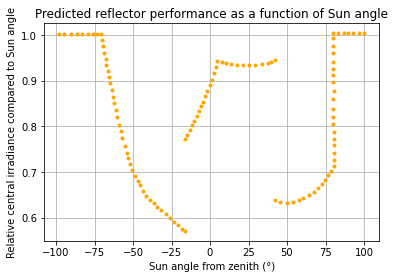

In [4]:
#Central irradiance VS Sun angle
plt.grid()
plt.plot(sun_angle,rel_irr,'.',color='orange')
plt.xlabel('Sun angle from zenith (°)')
plt.ylabel('Relative central irradiance compared to Sun angle')
plt.title('Predicted reflector performance as a function of Sun angle')

Text(0, 0.5, 'Normalized corner response')

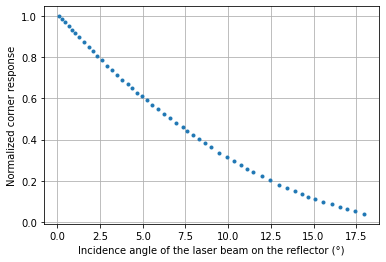

In [171]:
#Normalized corner response VS Moon libration
plt.grid()
plt.plot(moon_lib,corner_resp,'.')
plt.xlabel('Incidence angle of the laser beam on the reflector (°)')
plt.ylabel('Normalized corner response')

In [6]:
#ouverture des fichiers IR
path_ir='C://users/speed/Documents/Université/METEOR 1/reflecteurslunaires/dataGrasse/IR/' 
direc=os.listdir(path_ir)
data_ir=ascii.read(path_ir+"mini_IR_15_18.txt",format='no_header', guess=False)
for file in direc[1:]:
    with open(path_ir+file, "r") as f:
        temp=ascii.read(f.read(),format='no_header', guess=False)
        data_ir=vstack([data_ir,temp])
        
#print(data_ir)
N=len(data_ir)

In [7]:
#création liste de dates (avec heures+minutes)
year=np.zeros(N)
month=np.zeros(N)
day=np.zeros(N)
hour=np.zeros(N)
mins=np.zeros(N)
date=[]

for i in range (N):
    yr=data_ir['col1'][i][2:6]
    mth=data_ir['col1'][i][6:8]
    dy=data_ir['col1'][i][8:10]
    hr=data_ir['col1'][i][10:12]
    mns=data_ir['col1'][i][12:14]
    year[i]=yr
    month[i]=mth
    day[i]=dy
    hour[i]=hr
    mins[i]=mns
    dat=datetime(int(year[i]),int(month[i]),int(day[i]),int(hour[i]),int(mins[i])).isoformat(timespec='minutes')
    date.append(dat)


#print(date)

In [8]:
#création liste secondes
seconds=[]
for i in range (N):
    sec=int(data_ir['col1'][i][14:23])
    seconds.append(sec)
#print(seconds)

In [9]:
#création liste mesures
mesure=[]
for i in range (N):
    mes=int(data_ir['col1'][i][23:37])
    mesure.append(mes)
#print(mesure)

In [10]:
#création liste réflecteurs
reflec=[]
for i in range (N):
    rf=int(data_ir['col1'][i][37])
    reflec.append(rf)
#print(reflec)

In [11]:
#création liste echos
echos=[]
for i in range (N):
    ec=int(data_ir['col1'][i][43:46])
    echos.append(ec)
#print(echos)

In [12]:
#création liste incertitudes secondes
err_sec=[]
for i in range (N):
    e_s=data_ir['col1'][i][46:52]
    err_sec.append(e_s)
#print(err_sec)

In [13]:
#création liste ratio signal/bruit
snr=[]
for i in range (N):
    sig=int(data_ir['col1'][i][52:55])
    snr.append(sig)
#print(snr)

In [14]:
#création liste pression/atm
pression=[]
for i in range (N):
    press=int(data_ir['col2'][i][:6])
    pression.append(press)
#print(pression)

In [15]:
#création liste température atm
temp=[]
for i in range (N):
    tp=data_ir['col2'][i][6:11] #on ne met pas en int sinon on ne voit pas le signe de la température
    temp.append(tp)
#print(temp)

In [16]:
#création liste pourcentage humidité
humid=[]
for i in range (N):
    hum=int(data_ir['col2'][i][11:13])
    humid.append(hum)
#print(humid)

In [17]:
#création liste durée série
sequence=[]
for i in range (N):
    seq=int(data_ir['col2'][i][-4:])
    sequence.append(seq)
#print(seq)

In [18]:
#calcul taux de photons retournés (par le laser) par seconde
photon_rate=[]
for i in range(N):
    rate=echos[i]/sequence[i]
    photon_rate.append(rate)
    
#print(photon_rate)

In [19]:
#création liste bruit
noise=[]
for i in range(N):
    ns=photon_rate[i]/snr[i]
    noise.append(ns)
# print(noise)

<ipython-input-20-aecc34ec1717>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


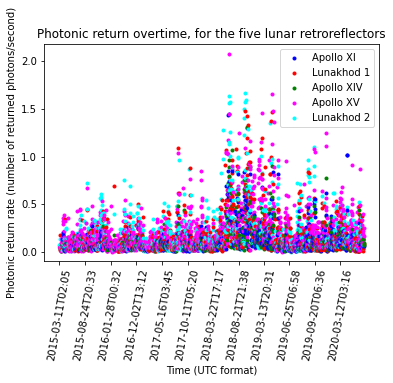

In [20]:
#graphe taux de photons retournés en fct du temps UTC
for i in range(N):
    if reflec[i]==0:
        plot1 = plt.plot(date[i],photon_rate[i],'.',color='blue')
    if reflec[i]==1:
        plot2 = plt.plot(date[i],photon_rate[i],'.',color='red')
    if reflec[i]==2:
        plot3 = plt.plot(date[i],photon_rate[i],'.',color='green')
    if reflec[i]==3:
        plot4 = plt.plot(date[i],photon_rate[i],'.',color='magenta')
    if reflec[i]==4:
        plot5 = plt.plot(date[i],photon_rate[i],'.',color='cyan')
        
plt.legend([plot1[0],plot2[0],plot3[0],plot4[0],plot5[0]],['Apollo XI','Lunakhod 1','Apollo XIV','Apollo XV','Lunakhod 2'])   

ax=plt.axes()
ax_date=date[::500]

ax.set_xticks(ax_date, minor = False)
plt.xticks(rotation = 80)
plt.xlabel('Time (UTC format)')
plt.ylabel('Photonic return rate (number of returned photons/second)')
plt.title('Photonic return overtime, for the five lunar retroreflectors')
plt.show()

#tout garder sur le même graphique ou séparer?

In [21]:
#ouverture des fichiers éphémérides
path='C://users/speed/Documents/Université/METEOR 1/ephemerids/'
dirs=os.listdir(path)
eph_list=ascii.read(path+"eph_15_01.txt", format='no_header', guess=False)
for file in dirs[1:]:
    with open(path+file, "r") as f:
        temp=ascii.read(f.read(), format='no_header', guess=False)
        eph_list=vstack([eph_list,temp])
print(eph_list)
N1=len(eph_list)

          col1           col2   col3  col4  ...  col12   col13  col14 
----------------------- ------ ----- ------ ... -------- ------ ------
2015-01-01T00:00:00.000   4.81  4.17   55.1 ... 0.984972  71.94 340.54
2015-01-01T00:10:00.000   4.79  4.19  55.02 ... 0.984975  71.95 339.51
2015-01-01T00:20:00.000   4.78   4.2  54.94 ... 0.984978  71.96 338.47
2015-01-01T00:30:00.000   4.76  4.21  54.85 ... 0.984981  71.97 337.41
2015-01-01T00:40:00.000   4.75  4.22  54.77 ... 0.984983  71.98 336.34
2015-01-01T00:49:59.999   4.74  4.23  54.68 ... 0.984986  71.99 335.25
2015-01-01T00:59:59.999   4.73  4.25   54.6 ... 0.984989   72.0 334.16
2015-01-01T01:09:59.999   4.72  4.26  54.51 ... 0.984992  72.01 333.04
2015-01-01T01:19:59.999   4.71  4.27  54.43 ... 0.984995  72.02 331.92
2015-01-01T01:30:00.000    4.7  4.29  54.35 ... 0.984998  72.03 330.78
                    ...    ...   ...    ... ...      ...    ...    ...
2021-01-01T04:09:59.999  354.7  -4.3 331.13 ... 0.985615 276.88  80.19
2021-0

In [22]:
#création des listes pour les années 2015 à 2020
eph_utc=eph_list['col1'] #dates éphémérides générées par le site de l'IMCCE
lam_sep=eph_list['col2'] #longitude 
phi_sep=eph_list['col3'] #latitude
lam_s=eph_list['col4'] #longitude SS
phi_s=eph_list['col5'] #latitude SS
npole=eph_list['col6']
dpole=eph_list['col7']
mv=eph_list['col8']
phase=eph_list['col9']
rapp=eph_list['col10']
dg=eph_list['col11']
dh=eph_list['col12']
paq=eph_list['col13']
q=eph_list['col14']

In [23]:
#conversion longitude SS: passage repère 0/360 à -180/+180
for i in range(N1):
    if lam_s[i]>180:
        lam_s[i]=lam_s[i]-360
#print(lam_s)

In [147]:
#coordonnées du réflecteur : Apollo 11

phi_r_1= 0.6934308 #latitude réflecteur
lam_r_1= 23.4543026  #longitude réflecteur

#Lunakhod 1
phi_r_2= 38.3330784
lam_r_2= -35.036674

#Apollo 14
phi_r_3= -3.6233280
lam_r_3= -17.4971027

#Apollo 15
phi_r_4= 0
# 26.1551690
lam_r_4= 3.6103512

#Lunakhod 2
phi_r_5= 25.8509889
lam_r_5= 30.9087373

phi_r=[phi_r_1,phi_r_2,phi_r_3,phi_r_4,phi_r_5]
lam_r=[lam_r_1,lam_r_2,lam_r_3,lam_r_4,lam_r_5]

In [148]:
#calcul de la hauteur du Soleil par rapport aux réflecteurs

#calcul des côtés du triangle: Apollo XI
rp_1=((phi_r_1 - phi_s)*np.pi/180).data #différence de latitude entre R et S
sp_1=((lam_s - lam_r_1)*np.pi/180).data #différence de longitude entre R et S

#Lunakhod 1
rp_2=((phi_r_2 - phi_s)*np.pi/180).data 
sp_2=((lam_s - lam_r_2)*np.pi/180).data

#Apollo XIV
rp_3=((phi_r_3 - phi_s)*np.pi/180).data 
sp_3=((lam_s - lam_r_3)*np.pi/180).data

#Apollo XV
rp_4=((phi_r_4 - phi_s)*np.pi/180).data 
sp_4=((lam_s - lam_r_4)*np.pi/180).data

#Lunakhod 2
rp_5=((phi_r_5 - phi_s)*np.pi/180).data 
sp_5=((lam_s - lam_r_5)*np.pi/180).data

#calcul de l'angle alpha: distance entre R et S
rp=[rp_1, rp_2, rp_3, rp_4, rp_5]
R=len(rp)
sp=[sp_1, sp_2, sp_3, sp_4, sp_5]
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
alpha=[a1,a2,a3,a4,a5]
#for i in range(R):
for i in range(R):
    for j in range(N1):
        atemp=m.acos(float(np.cos(rp[i][j])*np.cos(sp[i][j])))*180/np.pi # + np.sin(r[k])*np.sin(s[k])*0: l'angle P vaut 0
        alpha[i].append(atemp)
    alpha.append(alpha[i])

#print(a2)  

#calcul de l'angle beta: position du soleil par rapport au réflecteur
b1=[]
b2=[]
b3=[]
b4=[]
b5=[]
beta=[b1,b2,b3,b4,b5]
for i in range(R):
    for j in range(N1):
        if lam_s[j]>=lam_r[i]: 
            btemp=alpha[i][j] - (np.pi/2) #si on se trouve à l'est
        else:
            btemp=(np.pi/2) - alpha[i][j] #si on se trouve à l'ouest
        beta[i].append(btemp)
    beta.append(beta[i])

#print(b1)

Text(0, 0.5, 'Position du soleil par rapport au réflecteur (deg)')

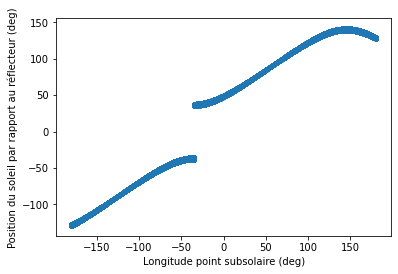

In [26]:
#beta en fonction de la longitude SS
plt.plot(lam_s,b2,'.')
plt.xlabel('Longitude point subsolaire (deg)')
plt.ylabel('Position du soleil par rapport au réflecteur (deg)')

In [149]:
#interpolation des éphémérides avec la première liste de dates

#conversion des dates (IMCCE)
eph_float=[] 
for i in range(N1):   
    x = datetime.fromisoformat(eph_utc[i])
    x0 = datetime(2015, 1, 1)
    delta = x -x0
    d = delta.days + delta.seconds/(24*3600)
    eph_float.append(d)

#print(eph_float)

#conversion des dates (data Grasse)
date_float=[] 
for j in range(N):   
    x = datetime.fromisoformat(date[j])
    x0 = datetime(2015, 1, 1)
    delta = x -x0
    d = delta.days + delta.seconds/(24*3600)
    date_float.append(d)

#print(date_float)

#interpolation: Apollo XI
f1=interp1d(eph_float,b1)
b1_bis=f1(date_float)

#Lunakhod 1
f2=interp1d(eph_float,b2)
b2_bis=f2(date_float)

#Apollo XIV
f3=interp1d(eph_float,b3)
b3_bis=f3(date_float)

#Apollo XV
f4=interp1d(eph_float,b4)
b4_bis=f4(date_float)

#Lunakhod 2
f5=interp1d(eph_float,b5)
b5_bis=f5(date_float)

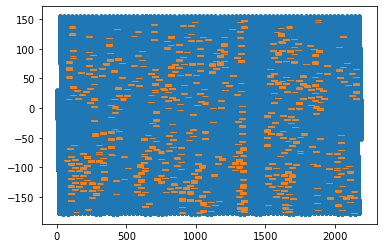

In [28]:
#visualisation des dates interpolées
plt.plot(eph_float, b1, '.', date_float, b1_bis, '_')

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(513)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(511)
<ipython-input-150-8841ce41ecfe>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(515)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(512)
<ipython-input-150-8841ce41ecfe>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

Text(0.5, 0.98, 'Taux de photons retournés en fonction du temps, en fonction de la hauteur du soleil par rapport au réflecteur (deg)')

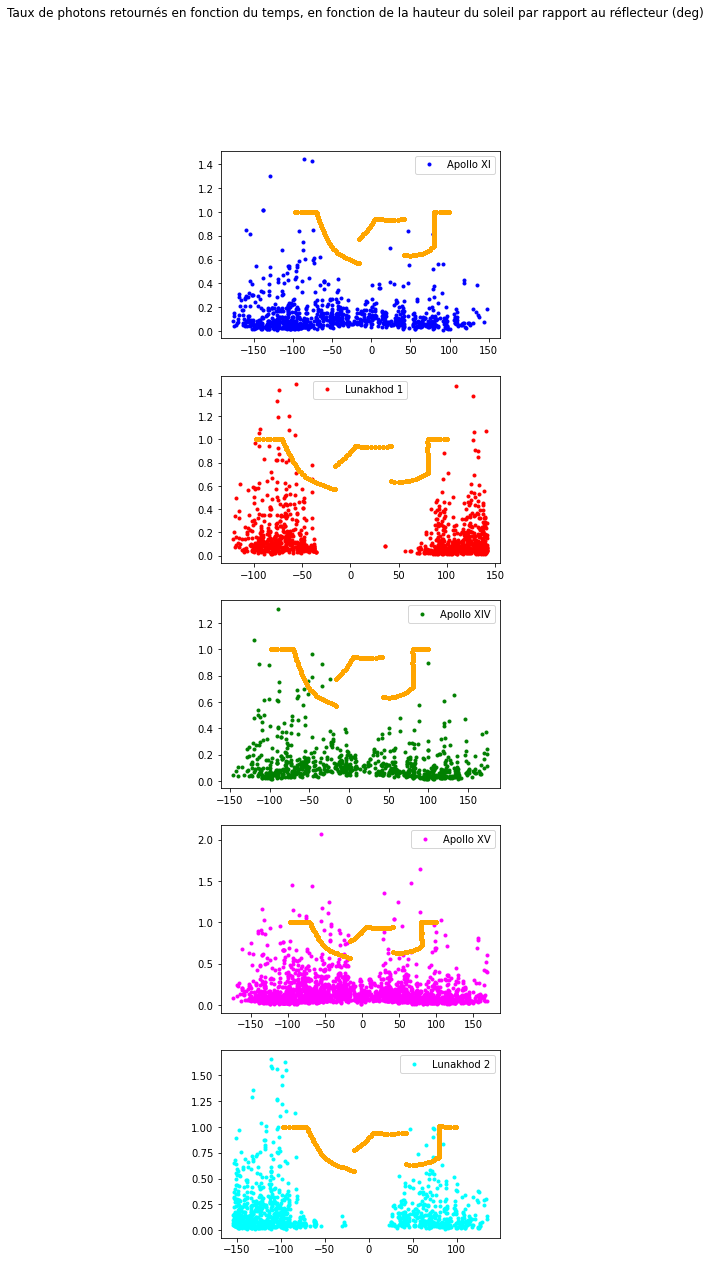

In [150]:
#graphe taux de photons retournés en fct de beta
plt.figure(figsize=(5,20))

for i in range(N):
    plt.plot(sun_angle,rel_irr,'.',color='orange') #courbe théorique  
    if reflec[i]==0:
        plt.subplot(511)
        plot1 = plt.plot(b1_bis[i],photon_rate[i],'.',color='blue')
        plt.legend([plot1[0]],['Apollo XI'])
    if reflec[i]==1:
        plt.subplot(512)
        plot2 = plt.plot(b2_bis[i],photon_rate[i],'.',color='red')
        plt.legend([plot2[0]],['Lunakhod 1'])
    if reflec[i]==2:
        plt.subplot(513)
        plot3 = plt.plot(b3_bis[i],photon_rate[i],'.',color='green')
        plt.legend([plot3[0]],['Apollo XIV'])
    if reflec[i]==3:
        plt.subplot(514)
        plot4 = plt.plot(b4_bis[i],photon_rate[i],'.',color='magenta')
        plt.legend([plot4[0]],['Apollo XV'])
    if reflec[i]==4:
        plt.subplot(515)
        plot5 = plt.plot(b5_bis[i],photon_rate[i],'.',color='cyan')
        plt.legend([plot5[0]],['Lunakhod 2'])
        
plt.suptitle('Taux de photons retournés en fonction du temps, en fonction de la hauteur du soleil par rapport au réflecteur (deg)')

   


<ipython-input-156-91c7da41dc2a>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(514)


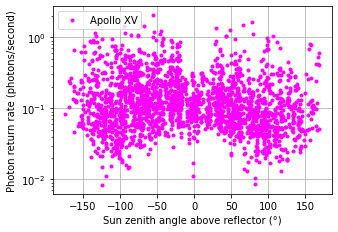

In [156]:
#graphe taux de photons retournés en fct de beta: version logarithmique

plt.figure(figsize=(5,20))
for i in range(N):
#     #plt.plot(sun_angle,rel_irr,'.',color='orange') #courbe théorique  
#     if reflec[i]==0:
#         plt.subplot(511)
#         plot1 = plt.semilogy(b1_bis[i],photon_rate[i],'.',color='blue')
#         #plt.xlim(-180,180)
#         plt.legend([plot1[0]],['Apollo XI']) 
        
#     if reflec[i]==1:
#         plt.subplot(512)
#         plt.grid()
#         plot2 = plt.semilogy(b2_bis[i],photon_rate[i],'.',color='red')
#         plt.legend([plot2[0]],['Lunakhod 1'])
#     if reflec[i]==2:
#         plt.subplot(513)
#         plot3 = plt.semilogy(b3_bis[i],photon_rate[i],'.',color='green')
#         plt.legend([plot3[0]],['Apollo XIV'])
    if reflec[i]==3:
        plt.subplot(514)
        plot4 = plt.semilogy(b4_bis[i],photon_rate[i],'.',color='magenta')
        plt.legend([plot4[0]],['Apollo XV'])
#     if reflec[i]==4:
#         plt.subplot(515)
#         plot5 = plt.semilogy(b5_bis[i],photon_rate[i],'.',color='cyan')
#         plt.legend([plot5[0]],['Lunakhod 2'])
    
   
    plt.xlabel('Sun zenith angle above reflector (°)')
    plt.ylabel('Photon return rate (photons/second)')   
    plt.grid()


#plt.suptitle('Photon rate overtime as a function of the Sun angle above each reflector(deg), logarithmic scale')


Text(0, 0.5, 'Occurence of values')

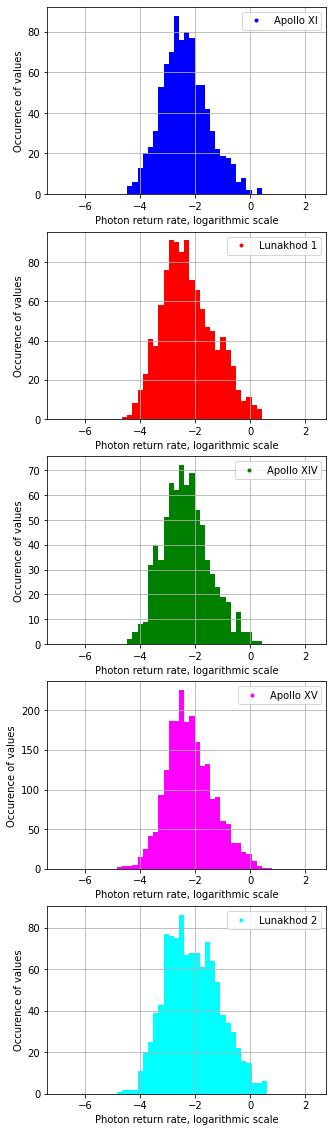

In [152]:
#Histogramme pour chaque réflecteur
#Intervalle échelle logarithmique I
I=np.logspace(-3.0,1.0,num=50,base=10.0)

#liste photon rate pour l'histogramme
photon_rate_1=[]
photon_rate_2=[]
photon_rate_3=[]
photon_rate_4=[]
photon_rate_5=[]
b_1=[]
b_2=[]
b_3=[]
b_4=[]
b_5=[]

for i in range(N):
    if reflec[i]==0:
        photon_rate_1.append(photon_rate[i])
        b_1.append(b1_bis[i])
    if reflec[i]==1:
        photon_rate_2.append(photon_rate[i])
        b_2.append(b2_bis[i])
    if reflec[i]==2:
        photon_rate_3.append(photon_rate[i])
        b_3.append(b3_bis[i])
    if reflec[i]==3:
        photon_rate_4.append(photon_rate[i])
        b_4.append(b4_bis[i])
    if reflec[i]==4:
        photon_rate_5.append(photon_rate[i])
        b_5.append(b5_bis[i])

plt.figure(figsize=(5,20)) 

#Apollo XI
plt.subplot(511)
plt.grid()
plt.hist(np.log(photon_rate_1),np.log(I),color='blue')
plt.legend([plot1[0]],['Apollo XI'])
plt.xlabel('Photon return rate, logarithmic scale')
plt.ylabel('Occurence of values')

#Lunakod 1
plt.subplot(512)
plt.grid()
plt.hist(np.log(photon_rate_2),np.log(I),color='red')
plt.legend([plot2[0]],['Lunakhod 1'])
plt.xlabel('Photon return rate, logarithmic scale')
plt.ylabel('Occurence of values')

#Apollo XIV
plt.subplot(513)
plt.grid()
plt.hist(np.log(photon_rate_3),np.log(I),color='green')
plt.legend([plot3[0]],['Apollo XIV'])
plt.xlabel('Photon return rate, logarithmic scale')
plt.ylabel('Occurence of values')

#Apollo XV
plt.subplot(514)
plt.grid()
plt.hist(np.log(photon_rate_4),np.log(I),color='magenta')
plt.legend([plot4[0]],['Apollo XV'])
plt.xlabel('Photon return rate, logarithmic scale')
plt.ylabel('Occurence of values')

#Lunakhod 2
plt.subplot(515)
plt.grid()
plt.hist(np.log(photon_rate_5),np.log(I),color='cyan')
plt.legend([plot5[0]],['Lunakhod 2'])
plt.xlabel('Photon return rate, logarithmic scale')
plt.ylabel('Occurence of values')

<Figure size 360x720 with 0 Axes>

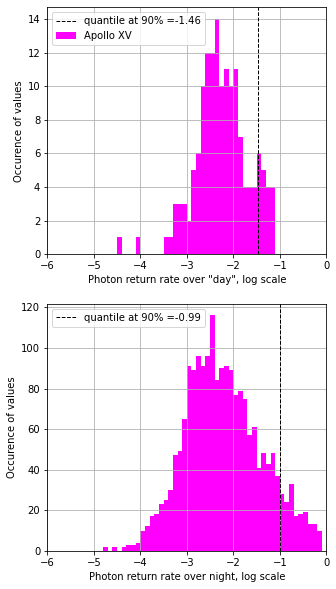

In [169]:
#histogrammes comparaison taux de photons le jour et la nuit
#ajouter légendes

#création de l'intervalle J
J=[]
for i in range(-100,0,1):
    J.append(i*0.1)

plt.figure(figsize=(5,10))

# #histogramme: Apollo XI
# b_1_n=np.where(np.logical_or(np.array(b_1)>12,np.array(b_1)<-38)) #nuit
# b_1_d=np.where(np.logical_and(np.array(b_1)<12,np.array(b_1)>-38)) #jour

# q_1_d=np.quantile(np.log(np.array(photon_rate_1)[b_1_d]),0.90)
# q_1_n=np.quantile(np.log(np.array(photon_rate_1)[b_1_n]),0.90)

# plt.subplot(211)
# plt.grid()
# h11=plt.hist(np.log(np.array(photon_rate_1)[b_1_d]),J,color='blue',label='Apollo XI')
# plt.xlim(-6,0)
# plt.xlabel('Photon return rate over "day", log scale')
# plt.ylabel('Occurence of values')
# plt.axvline(x=q_1_d, linewidth=1, linestyle='dashed',color='black',label='quantile at 90% ='+str(round(q_1_d,2)))
# plt.legend(loc='best')
# plt.subplot(212)
# plt.grid()
# h12=plt.hist(np.log(np.array(photon_rate_1)[b_1_n]),J,color='blue')
# plt.xlim(-6,0)
# plt.xlabel('Photon return rate over night, log scale')
# plt.ylabel('Occurence of values')
# plt.axvline(q_1_n, linewidth=1, linestyle='dashed',color='black',label='quantile at 90% ='+str(round(q_1_n,2)))
# plt.legend(loc='best')

# plt.figure(figsize=(5,10))
# #Lunakhod 1
# b_2_d=np.where(np.logical_and(np.array(b_2)>-10,np.array(b_2)<60)) #jour
# b_2_n=np.where(np.logical_or(np.array(b_2)<-10,np.array(b_2)>60)) #nuit

# q_2_d=np.quantile(np.log(np.array(photon_rate_2)[b_2_d]),0.90)
# q_2_n=np.quantile(np.log(np.array(photon_rate_2)[b_2_n]),0.90)

# plt.subplot(211)
# plt.grid()
# h21=plt.hist(np.log(np.array(photon_rate_2)[b_2_d]),J,color='red',label='Lunakhod 1')
# plt.xlim(-6,0)
# plt.xlabel('Photon return rate over day, log scale')
# plt.ylabel('Occurence of values')
# plt.axvline(x=q_2_d, linewidth=1, linestyle='dashed',color='black',label='quantile ='+str(round(q_2_d,2)))
# plt.legend(loc='best')
# plt.subplot(212)
# plt.grid()
# h22=plt.hist(np.log(np.array(photon_rate_2)[b_2_n]),J,color='red')
# plt.xlim(-6,0)
# plt.xlabel('Photon return rate over night, log scale')
# plt.ylabel('Occurence of values')
# plt.axvline(x=q_2_n, linewidth=1, linestyle='dashed',color='black',label='quantile ='+str(round(q_2_n,2)))
# plt.legend(loc='best')

# plt.figure(figsize=(5,10))
# #Apollo XIV
# b_3_d=np.where(np.logical_and(np.array(b_3)>2,np.array(b_3)<24)) #jour
# b_3_n=np.where(np.logical_or(np.array(b_3)<2,np.array(b_3)>24)) #nuit

# q_3_d=np.quantile(np.log(np.array(photon_rate_3)[b_3_d]),0.90)
# q_3_n=np.quantile(np.log(np.array(photon_rate_3)[b_3_n]),0.90)


# plt.subplot(211)
# plt.grid()
# h31=plt.hist(np.log(np.array(photon_rate_3)[b_3_d]),J,color='green',label='Apollo XIV')
# plt.xlim(-6,0)
# plt.xlabel('Photon return rate over "day", log scale')
# plt.ylabel('Occurence of values')
# plt.axvline(x=q_3_d, linewidth=1, linestyle='dashed',color='black',label='quantile at 90% ='+str(round(q_3_d,2)))
# plt.legend(loc='best')
# plt.subplot(212)
# plt.grid()
# h32=plt.hist(np.log(np.array(photon_rate_3)[b_3_n]),J,color='green')
# plt.xlim(-6,0)
# plt.xlabel('Photon return rate over night, log scale')
# plt.ylabel('Occurence of values')
# plt.axvline(x=q_3_n, linewidth=1, linestyle='dashed',color='black',label= 'quantile at 90% ='+str(round(q_3_n,2)))
# plt.legend(loc='best')

plt.figure(figsize=(5,10))
#Apollo XV
b_4_n=np.where(np.logical_or(np.array(b_4)>15,np.array(b_4)<-15)) #nuit
b_4_d=np.where(np.logical_and(np.array(b_4)<15,np.array(b_4)>-15)) #jour

q_4_d=np.quantile(np.log(np.array(photon_rate_4)[b_4_d]),0.90)
q_4_n=np.quantile(np.log(np.array(photon_rate_4)[b_4_n]),0.90)

plt.subplot(211)
plt.grid()
h41=plt.hist(np.log(np.array(photon_rate_4)[b_4_d]),J,color='magenta',label='Apollo XV')
plt.xlim(-6,0)
plt.xlabel('Photon return rate over "day", log scale')
plt.ylabel('Occurence of values')
plt.axvline(x=q_4_d, linewidth=1, linestyle='dashed',color='black',label= 'quantile at 90% ='+str(round(q_4_d,2)))
plt.legend(loc='best')
plt.subplot(212)
plt.grid()
h42=plt.hist(np.log(np.array(photon_rate_4)[b_4_n]),J,color='magenta')
plt.xlim(-6,0)
plt.xlabel('Photon return rate over night, log scale')
plt.ylabel('Occurence of values')
plt.axvline(x=q_4_n, linewidth=1, linestyle='dashed',color='black',label= 'quantile at 90% ='+str(round(q_4_n,2)))
plt.legend(loc='best')

# plt.figure(figsize=(5,10))
# #Lunakhod 2


# b_5_n=np.where(np.logical_or(np.array(b_5)>5,np.array(b_5)<-55)) #nuit
# b_5_d=np.where(np.logical_and(np.array(b_5)<5,np.array(b_5)>-55)) #jour

# q_5_d=np.quantile(np.log(np.array(photon_rate_5)[b_5_d]),0.90)
# q_5_n=np.quantile(np.log(np.array(photon_rate_5)[b_5_n]),0.90)


# plt.subplot(211)
# plt.grid()
# h51=plt.hist(np.log(np.array(photon_rate_5)[b_5_d]),J,color='cyan',label='Lunakhod 2')
# plt.xlim(-6,0)
# plt.xlabel('Photon return rate over day, log scale')
# plt.ylabel('Occurence of values')
# plt.axvline(x=q_5_d, linewidth=1, linestyle='dashed',color='black',label='quantile ='+str(round(q_5_d,2)))
# plt.legend(loc='best')

# plt.subplot(212)
# plt.grid()
# h52=plt.hist(np.log(np.array(photon_rate_5)[b_5_n]),J,color='cyan')
# plt.xlim(-6,0)
# plt.xlabel('Photon return rate over night, log scale')
# plt.ylabel('Occurence of values')
# plt.axvline(x=q_5_n, linewidth=1, linestyle='dashed',color='black',label='quantile ='+str(round(q_5_n,2)))
# plt.legend(loc='best')


In [33]:
#création des histogrammes: data vendredi 8/01
path2='C://users/speed/Documents/Université/METEOR 1/reflecteurslunaires/dataGrasse/reflec_data_8_01/'
dirs2=os.listdir(path2)

#liste expérimentale apollo 11
a11_list=ascii.read(path2+"apollo11_1.txt",data_start=6)
for file in dirs2[1:3]:
    with open(path2+file, "r") as f:
        temp=ascii.read(f.read(), data_start=6)
        a11_list=vstack([a11_list,temp])
#print(a11_list)
N2=len(a11_list)
time_a11_exp=a11_list['col1']
o_c_a11=a11_list['col7']

#apollo 14
a14_list=ascii.read(path2+"apollo14_1.txt",data_start=6)
for file in dirs2[4:5]:
    with open(path2+file, "r") as f:
        temp=ascii.read(f.read(), data_start=6)
        a14_list=vstack([a14_list,temp])
#print(a14_list)
N3=len(a14_list)
time_a14_exp=a14_list['col1']
o_c_a14=a14_list['col7']

#apollo 15
a15_list=ascii.read(path2+"apollo15_1.txt",data_start=6)
for file in dirs2[6:7]:
    with open(path2+file, "r") as f:
        temp=ascii.read(f.read(), data_start=6)
        a15_list=vstack([a15_list,temp])
#print(a15_list)
N4=len(a15_list)
time_a15_exp=a15_list['col1']
o_c_a15=a15_list['col7']

#lunakhod 1
l1_list=ascii.read(path2+"lunakhod1_1.txt",data_start=6)
for file in dirs2[8:9]:
    with open(path2+file, "r") as f:
        temp=ascii.read(f.read(), data_start=6)
        l1_list=vstack([l1_list,temp])
#print(l1_list)
N5=len(l1_list)
time_l1_exp=l1_list['col1']
o_c_l1=l1_list['col7']

#lunakhod 2
l2_list=ascii.read(path2+"lunakhod2_1.txt",data_start=6)
for file in dirs2[10:]:
    with open(path2+file, "r") as f:
        temp=ascii.read(f.read(), data_start=6)
        l2_list=vstack([l2_list,temp])
#print(l2_list)
N6=len(l2_list)
time_l2_exp=l2_list['col1']
o_c_l2=l2_list['col7']

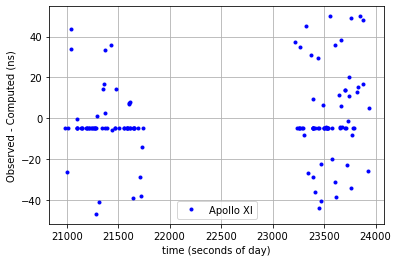

In [34]:
#Observed - Computed: Apollo XI
plt.grid()
plt.plot(time_a11_exp[np.abs(o_c_a11)<10000],o_c_a11[np.abs(o_c_a11)<10000],'.', label='Apollo XI',color='blue')
plt.xlabel('time (seconds of day)')
plt.ylabel('Observed - Computed (ns)')
plt.legend(loc='best')

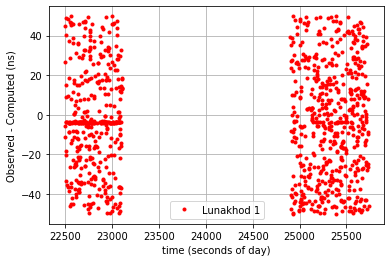

In [35]:
#Lunakhod 1
plt.grid()
plt.plot(time_l1_exp[np.abs(o_c_l1)<10000],o_c_l1[np.abs(o_c_l1)<10000],'.', label='Lunakhod 1',color='red')
plt.xlabel('time (seconds of day)')
plt.ylabel('Observed - Computed (ns)')
plt.legend(loc='best')

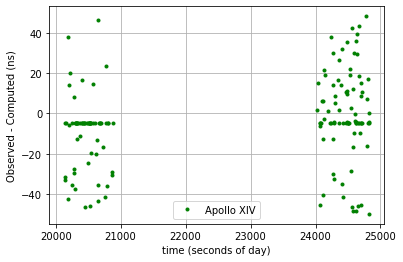

In [36]:
#Apollo XIV
plt.grid()
plt.plot(time_a14_exp[np.abs(o_c_a14)<10000],o_c_a14[np.abs(o_c_a14)<10000],'.', label='Apollo XIV',color='green')
plt.xlabel('time (seconds of day)')
plt.ylabel('Observed - Computed (ns)')
plt.legend(loc='best')

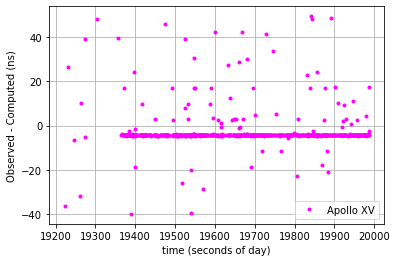

In [37]:
#Apollo XV
plt.grid()
plt.plot(time_a15_exp[np.abs(o_c_a15)<10000],o_c_a15[np.abs(o_c_a15)<10000],'.', label='Apollo XV',color='magenta')
plt.xlabel('time (seconds of day)')
plt.ylabel('Observed - Computed (ns)')
plt.legend(loc='best')

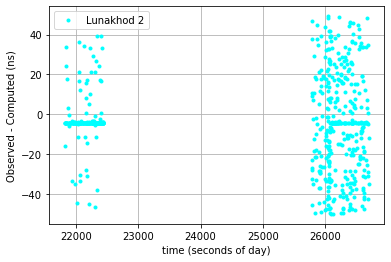

In [38]:
#Lunakhod 2
plt.grid()
plt.plot(time_l2_exp[np.abs(o_c_l2)<10000],o_c_l2[np.abs(o_c_l2)<10000],'.', label='Lunakhod 2',color='cyan')
plt.xlabel('time (seconds of day)')
plt.ylabel('Observed - Computed (ns)')
plt.legend(loc='best')

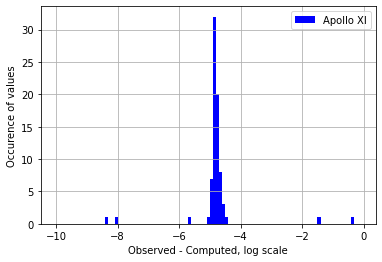

In [39]:
#Histogramme observed-computed: Apollo XI
#pourquoi intervalle J entre -100 et 0? pour centrer l'intervalle

#lorsqu'il y a du bruit: c'est le jour
#si il y a globalement 1 pic: c'est la nuit
plt.grid()
plt.hist(o_c_a11[np.abs(o_c_a11)<10000],J, label='Apollo XI',color='blue')
plt.xlabel('Observed - Computed, log scale')
plt.ylabel('Occurence of values')
plt.legend(loc='best')

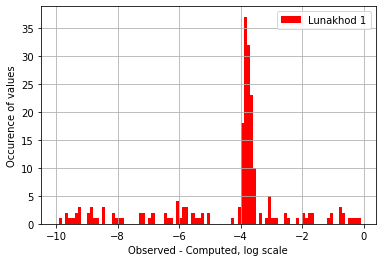

In [40]:
#Lunakhod 1
plt.grid()
plt.hist(o_c_l1[np.abs(o_c_l1)<10000],J, label='Lunakhod 1',color='red')
plt.xlabel('Observed - Computed, log scale')
plt.ylabel('Occurence of values')
plt.legend(loc='best')

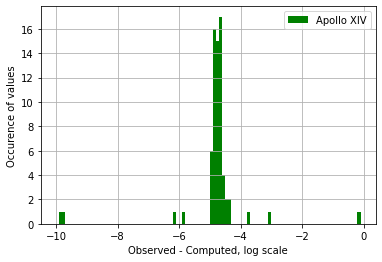

In [41]:
#Apollo XIV
plt.grid()
plt.hist(o_c_a14[np.abs(o_c_a14)<10000],J, label='Apollo XIV',color='green')
plt.xlabel('Observed - Computed, log scale')
plt.ylabel('Occurence of values')
plt.legend(loc='best')

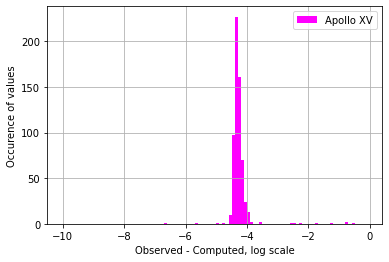

In [42]:
#Apollo XV
plt.grid()
plt.hist(o_c_a15[np.abs(o_c_a15)<10000],J, label='Apollo XV',color='magenta')
plt.xlabel('Observed - Computed, log scale')
plt.ylabel('Occurence of values')
plt.legend(loc='best')

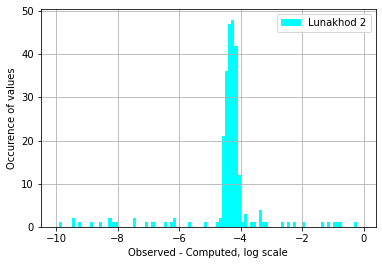

In [43]:
#Lunakhod 2
plt.grid()
plt.hist(o_c_l2[np.abs(o_c_l2)<10000],J, label='Lunakhod 2',color='cyan')
plt.xlabel('Observed - Computed, log scale')
plt.ylabel('Occurence of values')
plt.legend(loc='best')

Text(0, 0.5, 'Signal to noise ratio (unit?)')

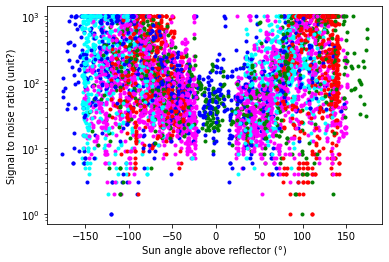

In [44]:
#graphe SNR en fonction de bêta

for i in range(N):
    if reflec[i]==0:
        plot1 = plt.semilogy(b1_bis[i],snr[i],'.',color='blue')
    if reflec[i]==1:
        plot2 = plt.semilogy(b2_bis[i],snr[i],'.',color='red')
    if reflec[i]==2:
        plot3 = plt.semilogy(b3_bis[i],snr[i],'.',color='green')
    if reflec[i]==3:
        plot4 = plt.semilogy(b4_bis[i],snr[i],'.',color='magenta')
    if reflec[i]==4:
        plot5 = plt.semilogy(b5_bis[i],snr[i],'.',color='cyan')
        
# plt.legend([plot1[0],plot2[0],plot3[0],plot4[0],plot5[0]],['Apollo XI','Lunakhod 1','Apollo XIV','Apollo XV','Lunakhod 2'])
plt.xlabel('Sun angle above reflector (°)')
plt.ylabel('Signal to noise ratio (unit?)')

Text(0, 0.5, 'Signal with noise removed')

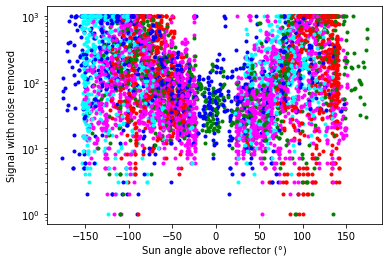

In [45]:
#graphe photon rate without noise

sig_free=[]
for j in range(N):
    temp=(photon_rate[j]-noise[j])/noise[j]
    sig_free.append(temp)

#print(sig_free)
for i in range(N):
    if reflec[i]==0:
        plot1 = plt.semilogy(b1_bis[i],sig_free[i],'.',color='blue')
    if reflec[i]==1:
        plot2 = plt.semilogy(b2_bis[i],sig_free[i],'.',color='red')
    if reflec[i]==2:
        plot3 = plt.semilogy(b3_bis[i],sig_free[i],'.',color='green')
    if reflec[i]==3:
        plot4 = plt.semilogy(b4_bis[i],sig_free[i],'.',color='magenta')
    if reflec[i]==4:
        plot5 = plt.semilogy(b5_bis[i],sig_free[i],'.',color='cyan')
        
# plt.legend([plot1[0],plot2[0],plot3[0],plot4[0],plot5[0]],['Apollo XI','Lunakhod 1','Apollo XIV','Apollo XV','Lunakhod 2'])
plt.xlabel('Sun angle above reflector (°)')
plt.ylabel('Signal with noise removed')   